Clara Ross Independent Study

9/28/2021 - 10/4/2021

pymiescatt examples


In [299]:
import PyMieScatt as ps
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import optical constants

In [300]:
### pure CO optical constants from E1.NK file
colnames = ["freq [cm-1]","wavelength (um)","absorbance","n_co","k_co"]
f = lambda x : float(x.replace("D","E"))
converter = {"freq [cm-1]":float,"wavelength (um)":f,"absorbance":f,"n_co":f,"k_co":f}
df_co = pd.read_csv("E1.NK",sep='\s+',skiprows=4,names=colnames,converters=converter)
df_co

### retrieve wavelength and refractive indices
co_lam=df_co["wavelength (um)"]
co_real=df_co["n_co"]
co_imag=df_co["k_co"]


In [301]:
### Silicate optical constants from Ossenkopf'92
colnames = ["wavelength (um)","n_si1","k_si1","n_si2","k_si2"]
f = lambda x : float(x.replace("d","e"))
converter = {"wavelength (um)":f,"n_si1":float,"k_si1":f,"n_si2":float,"k_si2":f}
df_si = pd.read_csv("nk_ossenkopf.txt",sep='\s+',skiprows=2,names=colnames,converters=converter)
df_si

# set 1- warm oxygen-deficient silicates
si1_lam = df_si["wavelength (um)"]
si1_real = df_si["n_si1"]
si1_imag = df_si["k_si1"]

# set 2- cool oxygen-rich silicates
si2_lam = df_si["wavelength (um)"]
si2_real = df_si["n_si2"]
si2_imag = df_si["k_si2"]

In [302]:
### pure water ice from https://atmos.uw.edu/ice_optical_constants/ ASCII data
### warren 1984

colnames = ["wavelength (um)","n_h2o","k_h2o"]
#f = lambda x : float(x.replace("d","e"))
converter = {"wavelength (um)":float,"n_h2o":float,"k_h2o":float}
df_h2o = pd.read_csv("pure_water_ice.txt",sep='\s+',skiprows=1,names=colnames,converters=converter)

### retrieve wavelength and refractive indices
h2o_lam=df_h2o["wavelength (um)"]
h2o_real=df_h2o["n_h2o"]
h2o_imag=df_h2o["k_h2o"]

In [303]:
### pure CO2 at 10K from pontoppidan
colnames = ["freq [cm-1]","wavelength (um)","absorbance","n_co2","k_co2"]
f = lambda x : float(x.replace("D","E"))
converter = {"freq [cm-1]":float,"wavelength (um)":f,"absorbance":f,"n_co2":f,"k_co2":f}
df_co2 = pd.read_csv("E14.NK",sep='\s+',skiprows=4,names=colnames,converters=converter)

### retrieve wavelength and refractive indices
co2_lam=df_co2["wavelength (um)"]
co2_real=df_co2["n_co2"]
co2_imag=df_co2["k_co2"]

# Mie Scattering for Single Particles

### MieQ
Computes Mie efficencies Q and asymmetry parameter g of a single, homogeneous particle.

Input parameters:
MieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])
- m: The complex refractive index, with the convention m = n+ik.
- wavelength: The wavelength of incident light, in nanometers.
- diameter: The diameter of the particle, in nanometers.
- nMedium: The refractive index of the surrounding medium. This must be positive, nonzero, and real. Any imaginary part will be discarded.
- asDict: If specified and set to True, returns the results as a dict.
- asCrossSection: If specified and set to True, returns the results as optical cross-sections with units of $nm^2$.


In [304]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
d = 200 #[nm]
ps.MieQ(m,w,d,asDict=True)

{'Qext': 1.693237598485073,
 'Qsca': 0.4725443528128364,
 'Qabs': 1.2206932456722366,
 'g': 0.3153569918620273,
 'Qpr': 1.5442174328606284,
 'Qback': 0.25575930719896567,
 'Qratio': 0.5412387338385268}

### RayleighMieQ

If $x=\pi\,d_p/\lambda \ll 1$, use RayleighMieQ to compute Mie efficencies in the Rayleigh limit

Computes Mie efficencies of a spherical particle in the Rayleigh regime $x=\pi\,d_p/\lambda \ll 1$ given refractive index m, wavelength, and diameter. 

RayleighMieQ(m, wavelength, diameter[, nMedium=1.0, asDict=False, asCrossSection=False])

In [305]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
d = 20 #[nm]

print(np.pi*d/w)
ps.RayleighMieQ(m,w,d,asDict=True)

0.11810498697705989


{'Qext': 0.11657950835758038,
 'Qsca': 9.239791445283349e-05,
 'Qabs': 0.11648711044312755,
 'g': 0,
 'Qpr': 0.11657950835758038,
 'Qback': 0.00013859687167925024,
 'Qratio': 1.5}

### AutoMieQ

Returns Mie efficencies of a spherical particle according to either MieQ() or RayleighMieQ() depending on the magnitude of the size parameter. Good for studying parameter ranges or size distributions.

AutoMieQ(m, wavelength, diameter[, nMedium=1.0, crossover=0.01, asDict=False, asCrossSection=False])


# single particles across various ranges


### Diameter dependence

MieQ_withDiameterRange(m, wavelength[, nMedium=1.0, diameterRange=(10, 1000), nd=1000, logD=False])

Computes the Mie efficencies of particles across a diameter range using AutoMieQ().

input parameters:
- diameterRange: (tuple or list, optional) The diameter range, in nanometers. Convention is (smallest, largest). Defaults to (10, 1000).
- nd: (int, optional) The number of diameter bins in the range. Defaults to 1000.
- logD: (bool, optional) If True, will use logarithmically-spaced diameter bins. Defaults to False.

Returns
- diameters: (numpy.ndarray) An array of the diameter bins that calculations were performed on. Size is equal to nd.
- qext, qsca, qabs, g, qpr, qback, qratio: (numpy.ndarray) The Mie efficencies at each diameter.

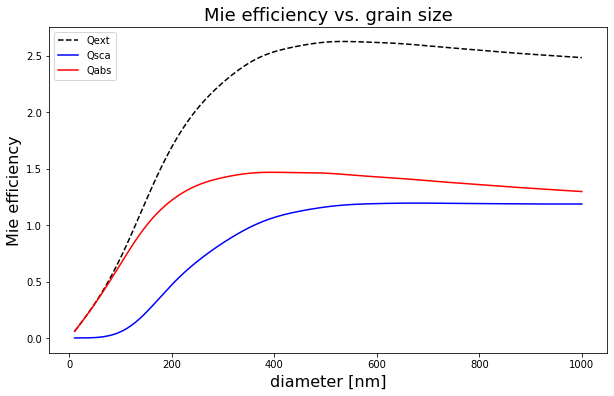

In [306]:
m = 1.5+0.5j # refractive index
w = 532 #[nm]
dRange = (10,1000) #[nm]
ndp = 1000 

diameters,qext,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withDiameterRange(m,w,diameterRange=dRange,nd=ndp)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(diameters,qext,'k',ls='dashed',label="Qext")
ax1.plot(diameters,qsca,'b',label="Qsca")
ax1.plot(diameters,qabs,'r',label="Qabs")

ax1.set_xlabel("diameter [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
ax1.set_title("Mie efficiency vs. grain size",fontsize=18)
ax1.legend()


### Wavelength dependence

MieQ_withWavelengthRange(m, diameter[, nMedium=1.0, wavelengthRange=(100, 1600), nw=1000, logW=False])

Computes the Mie efficencies of particles across a wavelength range using AutoMieQ(). This function can optionally take a list, tuple, or numpy.ndarray for m. If your particles have a wavelength-dependent refractive index, you can study it by specifying m as list-like. When doing so, m must be the same size as wavelengthRange, which is also specified as list-like in this situation. Otherwise, the function will construct a range from wavelengthRange[0] to wavelengthRange[1] with nw entries.

inputs 

- wavelengthRange: (tuple or list, optional) The wavelength range of incident light, in nanomaters. Convention is (smallest, largest). Defaults to (100, 1600). When m is list-like, len(wavelengthRange) must be equal to len(m).
- nw: (int, optional) The number of wavelength bins in the range. Defaults to 1000. This parameter is ignored if m is list-like.
- logW: (bool, optional) If True, will use logarithmically-spaced wavelength bins. Defaults to False. This parameter is ignored if m is list-like.

returns

- wavelengths: (numpy.ndarray) An array of the wavelength bins that calculations were performed on. Size is equal to nw, unless m was list-like. Then wavelengths = wavelengthRange.
- qext, qsca, qabs, g, qpr, qback, qratio: (numpy.ndarray) The Mie efficencies at each wavelength in wavelengths.



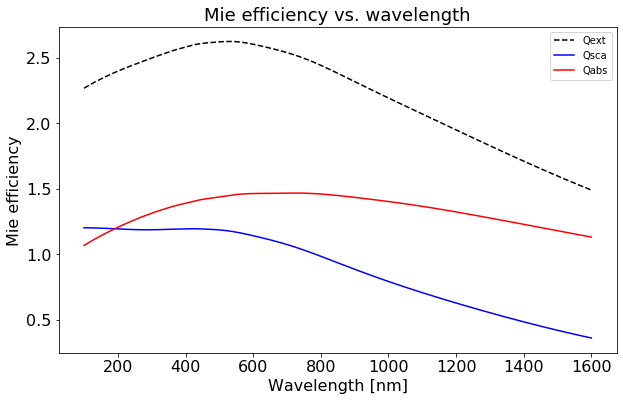

In [307]:
m = 1.5+0.5j # refractive index
d = 500 #[nm]
wRange = (100,1600) #[nm]

wavelengths,qext,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange(m,w,wavelengthRange=wRange)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(wavelengths,qext,'k',ls='dashed',label="Qext")
ax1.plot(wavelengths,qsca,'b',label="Qsca")
ax1.plot(wavelengths,qabs,'r',label="Qabs")

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Mie efficiency vs. wavelength",fontsize=18)
ax1.legend()



- size parameter ($x = \pi d_p /\lambda$): MieQ_withSizeParameterRange(m[, nMedium=1.0, xRange=(1, 10), nx=1000, logX=False])

size distributions of homogeneous spheres 

### Mie_SD

- efficiencies Q integrated over size distribution $n_d(d_p)$

Mie_SD(m, wavelength, sizeDistributionDiameterBins, sizeDistribution[, nMedium=1.0, SMPS=True, asDict=False])

# Angular Functions and Polarization

"These functions compute the angle-dependent scattered field intensities and scattering matrix elements. They return arrays that are useful for plotting"

### ScatteringFunction - single particle scattering intensity vs. angle
Plot the angular scattering intensity functions vs. angle for a single particle (for parallel, perpendicular, and unpolarized light) 

ScatteringFunction(m, wavelength, diameter[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])

Optional Input parameters:
- minAngle: (float, optional) The minimum scattering angle (in degrees) to be calculated. Defaults to 0.
- maxAngle: (float, optional) The maximum scattering angle (in degrees) to be calculated. Defaults to 180.
- angularResolution: (float, optional) The resolution of the output. Defaults to 0.5, meaning a value will be calculated for every 0.5 degrees.
- space: (str, optional) The measure of scattering angle. Can be ‘theta’ or ‘qspace’. Defaults to ‘theta’.
- angleMeasure: (str, optional) The units for the scattering angle
- normalization: (str or None, optional) Specifies the normalization method, which is either by total signal or maximum signal.
    - normalization = ‘t’ will normalize by the total integrated signal, that is, the total signal will have an integrated value of 1.
    - normalization = ‘max’ will normalize by the maximum value of the signal regardless of the angle at which it occurs, that is, the maximum signal at that angle will have a value of 1.

Outputs: Returns arrays that can be used to plot the scattering intensity of perpendicular, parallel, and unpolarized light vs. angle
- theta: (numpy.ndarray) An array of the angles used in calculations. Values will be spaced according to angularResolution, and the size of the array will be (maxAngle-minAngle)/angularResolution.
- SL: (numpy.ndarray) An array of the scattered intensity of left-polarized (perpendicular) light. Same size as the theta array.
- SR: (numpy.ndarray) An array of the scattered intensity of right-polarized (parallel) light. Same size as the theta array.
- SU: (numpy.ndarray) An array of the scattered intensity of unpolarized light, which is the average of SL and SR. Same size as the theta array.

theta space: geometric angle (in radians)

Q space: https://www.sciencedirect.com/science/article/pii/S0022407313000083
plotting scattering intensity vs. scattering wave vector $q = \frac{4 \pi}{\lambda}sin(\frac{\theta}{2})$

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


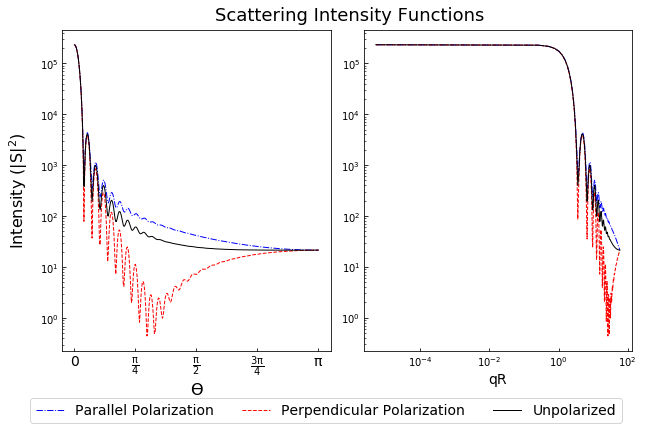

In [308]:
# example: calculate angle-dependent scattering functions for a single particle
m=1.7+0.5j
w=532
d=5000

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.ScatteringFunction(m,w,d)
qR,SLQ,SRQ,SUQ = ps.ScatteringFunction(m,w,d,space='qspace')
plt.close('all')

# graph the scattering intensities in theta-space and qR-space!
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

# plot 1 - scattering intensity vs. theta
# semi log y = only y-axis on log scale
ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# x ticks: four angles, radians
x_label = ["0", r"$\mathregular{\frac{\pi}{4}}$", r"$\mathregular{\frac{\pi}{2}}$",r"$\mathregular{\frac{3\pi}{4}}$",r"$\mathregular{\pi}$"]
x_tick = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
ax1.set_xticks(x_tick)
ax1.set_xticklabels(x_label,fontsize=14)
ax1.tick_params(which='both',direction='in')
ax1.set_xlabel("ϴ",fontsize=16)

# y ticks: intensity
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)

# plot 2 - scattering intensity vs. qR vector q=(4π/λ)sin(θ/2)
ax2.loglog(qR,SLQ,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax2.loglog(qR,SRQ,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax2.loglog(qR,SUQ,'k',lw=1,label="Unpolarized")


ax2.tick_params(which='both',direction='in')
ax2.set_xlabel("qR",fontsize=14)
handles, labels = ax1.get_legend_handles_labels()
fig1.legend(handles,labels,fontsize=14,ncol=3,loc=8)
fig1.suptitle("Scattering Intensity Functions",fontsize=18)
fig1.show()
plt.tight_layout(rect=[0.01,0.05,0.915,0.95])

### SF_SD - scattering intensity vs. angle for a size distribution of particles

SF_SD(m, wavelength, dp, ndp[, nMedium=1.0, minAngle=0, maxAngle=180, angularResolution=0.5, space='theta', angleMeasure='radians', normalization=None])

Creates arrays for plotting the angular scattering intensity functions in theta-space with parallel, perpendicular, and unpolarized light. Also includes an array of the angles for each step for a distribution nd(dp). Uses ScatteringFunction() to compute scattering for each particle size, then sums the contributions from each bin.

- dp: (list-like) The diameter bins of the distribution, in nanometers.
- ndp: (list-like) The number of particles in each diameter bin in dp.

I think this function allows you to compute general scattering vs. angle for a size distribution by summing the intensities at each angle across all the sizes. But it does not give scattering vs. size.

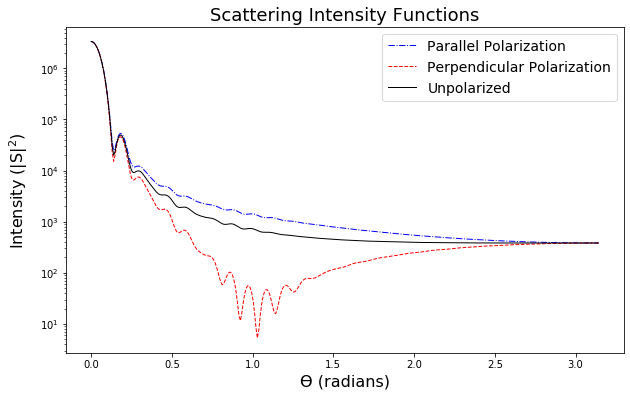

In [309]:
# attempt SF_SD function for 3 diameter bins

m=1.7+0.5j #complex refractive index
w=532 #wavelength [nm]
dp= [4000, 4500, 5000] # diameter [nm] of each bin
ndp = [10,8,5] # number of particles in each bin

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.SF_SD(m,w,dp,ndp)

# graph parallel polarization vs. theta for 3 diameters
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# axis labels
ax1.set_xlabel("ϴ (radians)",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title("Scattering Intensity Functions",fontsize=18)
ax1.legend(fontsize=14)

Text(0.5, 1.0, 'MRN power law distribution of grain sizes')

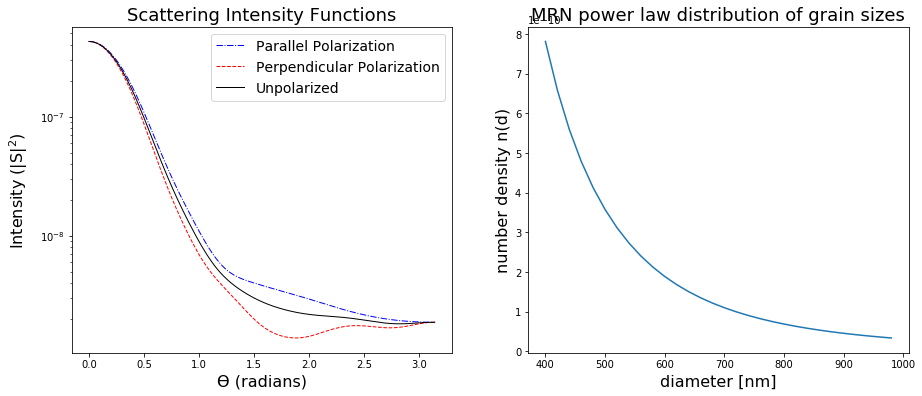

In [310]:
# SF_SD for MRN distribution of grains ranging from 0.4 to 1.0 microns diameter

m=1.7+0.5j #complex refractive index
w=532 #wavelength [nm]
dp = np.arange(400,1000,20) #[nm]
ndp = dp**(-3.5)

# use pymiescatt to compute arrays
theta,SL,SR,SU = ps.SF_SD(m,w,dp,ndp)

# graph parallel polarization vs. theta for 3 diameters
fig=plt.figure(1,figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.semilogy(theta,SL,'b',ls='dashdot',lw=1,label="Parallel Polarization")
ax1.semilogy(theta,SR,'r',ls='dashed',lw=1,label="Perpendicular Polarization")
ax1.semilogy(theta,SU,'k',lw=1,label="Unpolarized")

# axis labels
ax1.set_xlabel("ϴ (radians)",fontsize=16)
ax1.set_ylabel(r"Intensity ($\mathregular{|S|^2}$)",fontsize=16,labelpad=10)
handles, labels = ax1.get_legend_handles_labels()
ax1.set_title("Scattering Intensity Functions",fontsize=18)
ax1.legend(fontsize=14)

ax2.plot(dp,ndp)
ax2.set_xlabel("diameter [nm]",fontsize=16)
ax2.set_ylabel("number density n(d)",fontsize=16)
ax2.set_title("MRN power law distribution of grain sizes",fontsize=18)

# examples with CO ice


In [311]:
w = 1/(2140)*1e7 #[nm]
print(w)

4672.897196261682


CO absorption band centered around wavenumber = 2140 cm^-1

wavelength = 4670 nm

try wavelength range (4620,4720)

## extinction vs. wavelength for a size distribution

use Mie_SD to calculate efficiencies for a size distribution of solid CO ice spheres

From Ehrenfreund paper: "MRN distribution with grain radius of index -3.5 and cutoff radii of 0.005 and 0.3 microns"

In [312]:
# MRN size distribution
radii = np.arange(5,300,1) #[nm]
dp = 2*radii
ndp = radii**(-3.5)

# wavelengths from pontoppidan optical constants
ws = co_lam*1000 #[nm]

ext_arr = []
for i in np.arange(0,len(df_co)):
    Bext, Bsca, Babs, G, Bpr, Bback, Bratio = ps.Mie_SD(complex(co_real[i],co_imag[i]),ws[i],dp,ndp)
    ext_arr.append(Bext)

Text(0.5, 1.0, 'Extinction vs. wavelength for MRN size distribution')

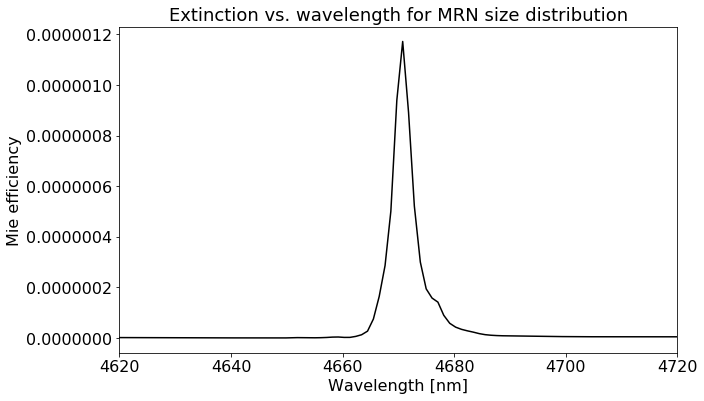

In [313]:
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(ws,ext_arr,'k')

ax1.set_xlim(4620,4720)

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength for MRN size distribution",fontsize=18)


## MieQ vs. MieQ_withWavelengthRange

How similar are the results from using MieQ() and iterating over the wavelengths vs. just using MieQ_withWavelengthRange?

- plot relative error of the results

In [314]:
### Solid CO sphere with radius = 24 nm
d = 24*2 #[nm]

# wavelengths from pontoppidan optical constants
ws = co_lam*1000 #[nm]

# MieQ
qext_mie = []
for i in np.arange(0,len(df_co)):
    Bext, Bsca, Babs, G, Bpr, Bback, Bratio = ps.MieQ(complex(co_real[i],co_imag[i]),ws[i],d)
    qext_mie.append(Bext)

In [315]:
# MieQ_withWavelengthRange
# same diameter

ws = (co_lam*1000).to_numpy()
w,qext_wave,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((co_real+1j*co_imag).to_numpy(),d,wavelengthRange=ws)


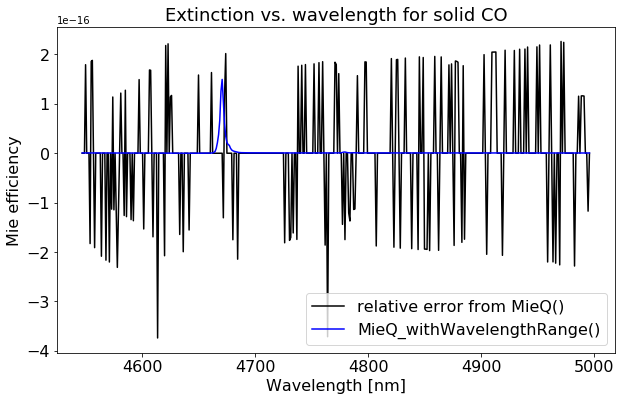

In [316]:
difference = (qext_wave-qext_mie)/qext_mie

# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(ws,difference,'k',label='relative error from MieQ()')
ax1.plot(w,qext_wave*5e-16,'b',label='MieQ_withWavelengthRange()')

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength for solid CO",fontsize=18)
ax1.legend(fontsize=16)

## extinction vs. wavelength for a single particle

Use MieQ_withWavelengthRange for simplicity


In [317]:
### Solid CO sphere

d = 24*2 #diameter [nm]
ws = (co_lam*1000).to_numpy() # wavelengths from pontoppidan optical constants [nm]

w_co,qext_co,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((co_real+1j*co_imag).to_numpy(),d,wavelengthRange=ws)


In [318]:
### solid silicate spheres from ossenkopf

# set 1 - warm oxygen-deficient silicates
d = 24*2 #diameter [nm]
ws1 = (si1_lam*1000).to_numpy() # wavelengths from ossenkopf optical constants [nm]
w_si1,qext_si1,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((si1_real+1j*si1_imag).to_numpy(),d,wavelengthRange=ws1)


# set 2 - cool oxygen-rich silicates
ws2 = (si2_lam*1000).to_numpy() # wavelengths from ossenkopf optical constants [nm]
w_si2,qext_si2,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((si2_real+1j*si2_imag).to_numpy(),d,wavelengthRange=ws2)



In [319]:
### solid pure water ice

d = 24*2 #diameter [nm]
ws = (h2o_lam*1000).to_numpy() 

w_h2o,qext_h2o,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((h2o_real+1j*h2o_imag).to_numpy(),d,wavelengthRange=ws)


In [320]:
### CO2 10K pontoppidan

d = 24*2 #diameter [nm]
ws = (co2_lam*1000).to_numpy() # wavelengths from pontoppidan optical constants [nm]
w_co2,qext_co2,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((co2_real+1j*co2_imag).to_numpy(),d,wavelengthRange=ws)


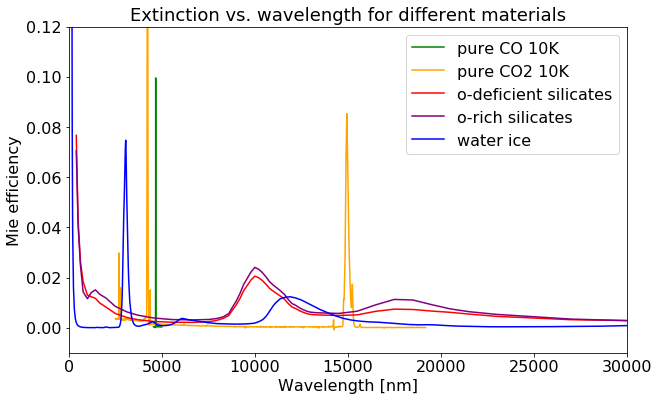

In [321]:
# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(w_co,qext_co/3,'green',label='pure CO 10K')
ax1.plot(w_co2,qext_co2,'orange',label='pure CO2 10K')
ax1.plot(w_si1,qext_si1,'r',label='o-deficient silicates')
ax1.plot(w_si2,qext_si2,'purple',label='o-rich silicates')
ax1.plot(w_h2o,qext_h2o,'b',label='water ice')

ax1.set_xlim(0,30000)
#ax1.set_xlim(4500,4800)
ax1.set_ylim(-0.01,0.12)

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength for different materials",fontsize=18)
ax1.legend(fontsize=16)

### Fill in missing wavelength values

In [322]:
def wave_append(df1,df2):
    #add empty columns to each dataframe
    df1_nan = df1.reindex(columns=df1.columns.tolist()+df2.columns.tolist())
    df2_nan = df2.reindex(columns=df1.columns.tolist()+df2.columns.tolist())

    #append dataframes and sort rows by wavelength
    df_new = df1_nan.append(df2_nan)
    df_new = df_new.T.drop_duplicates().T #drop second (identical) wavelength column
    df_new = df_new.drop_duplicates(subset='wavelength (um)') # drop identical data
    df_new.sort_values(by="wavelength (um)",inplace=True,ignore_index=True)

    #fill NaN with linear interpolation
    df_new.interpolate(method='polynomial',order=1,inplace=True)
    
    return df_new

,freq [cm-1],wavelength (um),absorbance,n_co,k_co,n_si1,k_si1,n_si2,k_si2
0,NaN,0.4000,NaN,NaN,NaN,1.809,0.099940,1.775,0.089520
1,NaN,0.5000,NaN,NaN,NaN,1.840,0.077120,1.814,0.071440
2,NaN,0.6250,NaN,NaN,NaN,1.846,0.063560,1.827,0.058960
3,NaN,0.7692,NaN,NaN,NaN,1.850,0.057310,1.827,0.043370
4,NaN,1.0000,NaN,NaN,NaN,1.846,0.054620,1.807,0.046910
...,...,...,...,...,...,...,...,...,...
469,NaN,550.0000,NaN,NaN,NaN,2.905,0.044620,3.076,0.041950
470,NaN,1000.0000,NaN,NaN,NaN,2.906,0.024550,3.077,0.023080
471,NaN,2400.0000,NaN,NaN,NaN,2.906,0.010240,3.077,0.009618
472,NaN,5500.0000,NaN,NaN,NaN,2.906,0.004475,3.077,0.004200


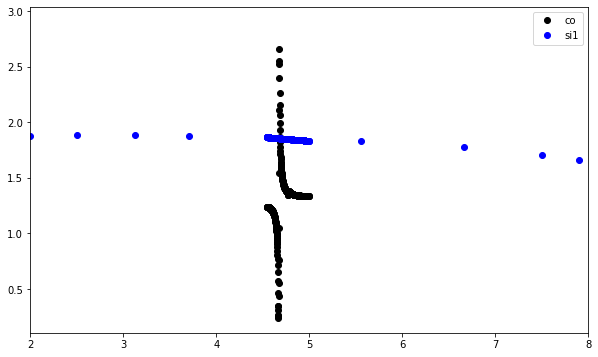

In [323]:
# Example with CO and silicate optical constants
df_co_si = wave_append(df_co,df_si)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df_co_si["wavelength (um)"],df_co_si["n_co"],'ko',label='co')
ax1.plot(df_co_si["wavelength (um)"],df_co_si["n_si1"],'bo',label='si1')
ax1.set_xlim(2,8)
ax1.legend()

df_co_si


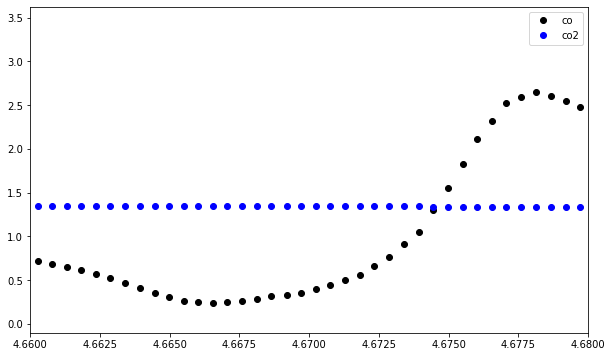

In [324]:
# Example with CO and CO2
df_co_co2 = wave_append(df_co,df_co2)

fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(df_co_co2["wavelength (um)"],df_co_co2["n_co"],'ko',label='co')
ax1.plot(df_co_co2["wavelength (um)"],df_co_co2["n_co2"],'bo',label='co2')
ax1.set_xlim(4.66,4.68)
ax1.legend()




## extinction vs. wavelength for a coated particle

MieQCoreShell(mCore, mShell, wavelength, dCore, dShell[, nMedium=1.0, asDict=False, asCrossSection=False])

- refractive index of silicate grain ?
- refractive index of CO ?

pontoppidan: "The coated sphere model was calculated using identical volumes of core and mantle, while the MRN model was calculated using a constant mantle thickness of 0.01 μm"

equal volumes of core/mantle about 29000 nm^3 each

radius core = 19

radius shell = 5 

total volume of solid sphere is about 29000*2=58000 nm^3

radius = 24

In [325]:
df_co_si

,freq [cm-1],wavelength (um),absorbance,n_co,k_co,n_si1,k_si1,n_si2,k_si2
0,NaN,0.4000,NaN,NaN,NaN,1.809,0.099940,1.775,0.089520
1,NaN,0.5000,NaN,NaN,NaN,1.840,0.077120,1.814,0.071440
2,NaN,0.6250,NaN,NaN,NaN,1.846,0.063560,1.827,0.058960
3,NaN,0.7692,NaN,NaN,NaN,1.850,0.057310,1.827,0.043370
4,NaN,1.0000,NaN,NaN,NaN,1.846,0.054620,1.807,0.046910
...,...,...,...,...,...,...,...,...,...
469,NaN,550.0000,NaN,NaN,NaN,2.905,0.044620,3.076,0.041950
470,NaN,1000.0000,NaN,NaN,NaN,2.906,0.024550,3.077,0.023080
471,NaN,2400.0000,NaN,NaN,NaN,2.906,0.010240,3.077,0.009618
472,NaN,5500.0000,NaN,NaN,NaN,2.906,0.004475,3.077,0.004200


In [326]:
### Solid CO sphere with diameter = 50 nm

d = 50 #diameter [nm]
ws = (co_lam*1000).to_numpy() # wavelengths from pontoppidan optical constants [nm]

w_sphere,qext_sphere,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((co_real+1j*co_imag).to_numpy(),d,wavelengthRange=ws)



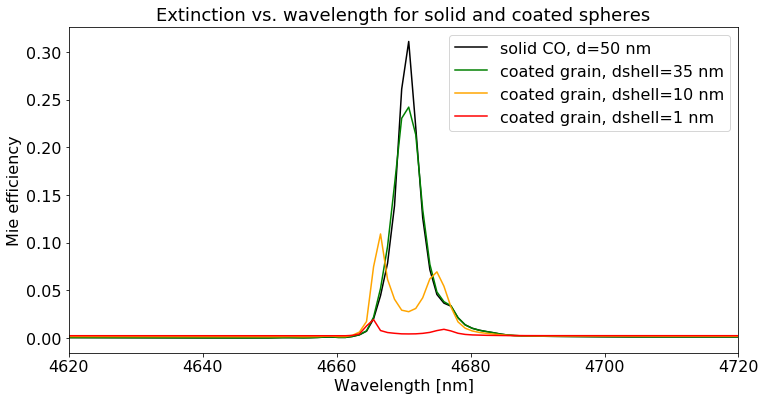

In [327]:
### Coated particle with total diameter = 50 nm
# CO constants from pontopiddan and silicate constants from ossenkopf

# 10 nm ice mantle
size1 = [40,50]

# approximate the solid ice sphere (matches exactly!!)
size2 = [15,50]

# approximate solid silicate sphere (no CO absorption band)
size3 = [49,50]

# parameters for silicate core (Si 1)
mcore_r = df_co_si["n_si1"]
mcore_i = df_co_si["k_si1"]

# parameters for CO ice mantle
mshell_r = df_co_si["n_co"]
mshell_i = df_co_si["k_co"]

# create array of wavelengths
w_coat = df_co_si["wavelength (um)"]*1000 #[nm]
index = np.arange(0,len(w_coat))

qext_coat1 = []
for i in index:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.MieQCoreShell(mcore_r[i]+1j*mcore_i[i],mshell_r[i]+1j*mshell_i[i],w_coat[i],size1[0],size1[1])
    qext_coat1.append(Qext)

qext_coat2 = []
for i in index:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.MieQCoreShell(mcore_r[i]+1j*mcore_i[i],mshell_r[i]+1j*mshell_i[i],w_coat[i],size2[0],size2[1])
    qext_coat2.append(Qext) 

qext_coat3 = []
for i in index:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.MieQCoreShell(mcore_r[i]+1j*mcore_i[i],mshell_r[i]+1j*mshell_i[i],w_coat[i],size3[0],size3[1])
    qext_coat3.append(Qext)

# plot
fig=plt.figure(1,figsize=(12,6))
ax1=fig.add_subplot(111)
ax1.plot(w_sphere,qext_sphere,'k',label='solid CO, d=50 nm')
ax1.plot(w_coat,qext_coat2,'g',label='coated grain, dshell=35 nm')
ax1.plot(w_coat,qext_coat1,'orange',label='coated grain, dshell=10 nm')
ax1.plot(w_coat,qext_coat3,'r',label='coated grain, dshell=1 nm')

ax1.set_xlim(4620,4720)

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength for solid and coated spheres",fontsize=18)
ax1.legend(fontsize=16)

## Rayleigh limit

$x=\pi\,d_p/\lambda \ll 1$

assume diameter d = 200 nm

$\pi\,d_p/\lambda < 1$ when $\lambda >$ 628 nm

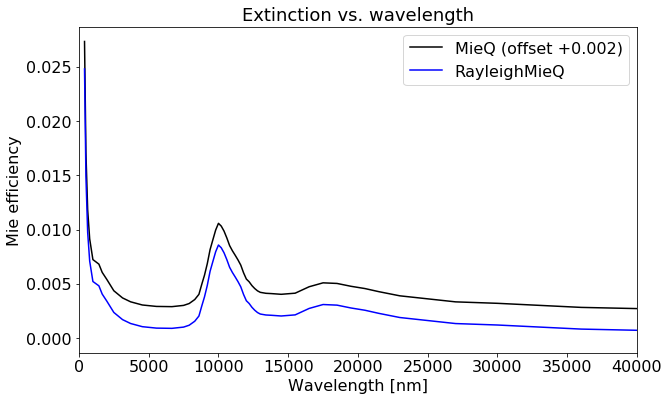

In [328]:
d = 20 #[nm]


# wavelengths from optical constants
ws = si1_lam*1000 #[nm]
index = np.arange(0,len(df_si))

# index of refraction
real = si1_real
imag = si1_imag

# MieQ
qext_mie = []
for i in index:
    Bext, Bsca, Babs, G, Bpr, Bback, Bratio = ps.MieQ(complex(real[i],imag[i]),ws[i],d)
    qext_mie.append(Bext+0.002) 


# RayleighMieQ, in Rayleigh limit
qext_ray = []
for i in index:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.RayleighMieQ(complex(real[i],imag[i]),ws[i],d)
    qext_ray.append(Qext)
    
# AutoMieQ
qext_auto = []
for i in index:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.AutoMieQ(complex(real[i],imag[i]),ws[i],d)
    qext_auto.append(Qext)

# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(ws,qext_mie,'k',label='MieQ (offset +0.002)')
ax1.plot(ws,qext_ray,'b',label='RayleighMieQ')
#ax1.plot(ws,qext_auto,'r',label='AutoMieQ')
#ax1.set_yscale('log')

ax1.set_xlim(0,4e4)
#ax1.set_ylim(.5,1)

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength",fontsize=18)
ax1.legend(fontsize=16)

For this dataset, RayleighMieQ equals MieQ at all wavelengths... I assume because the indices of refraction blow up to infinity already at wavelengths around 100 nm

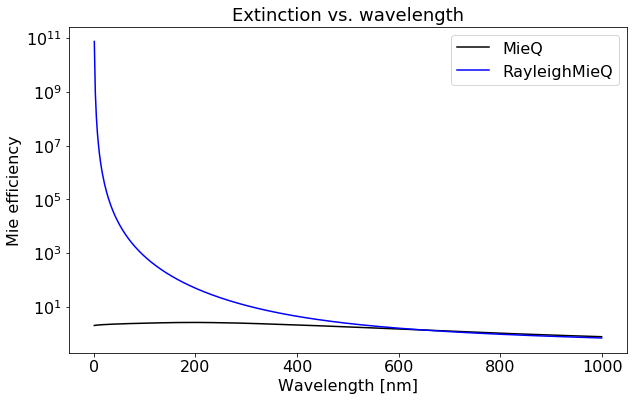

In [329]:
m = 1.5+0.5j
d = 200 #[nm]

# create array of wavelengths
ws = np.arange(1,1000,2) #[nm]

# MieQ
qext_mie = []
for w in ws:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.MieQ(m,w,d)
    qext_mie.append(Qext)

# RayleighMieQ, in Rayleigh limit
qext_ray = []
for w in ws:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.RayleighMieQ(m,w,d)
    qext_ray.append(Qext)

qext_auto = []
for w in ws:
    Qext, Qsca, Qabs, G, Qpr, Qback, Qratio = ps.AutoMieQ(m,w,d)
    qext_auto.append(Qext)

    
# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(ws,qext_mie,'k',label='MieQ')
ax1.plot(ws,qext_ray,'b',label='RayleighMieQ')
#ax1.plot(ws,qext_auto,'r',label='AutoMieQ')
ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)

ax1.set_yscale('log')
#ax1.set_xlim(600,800)

for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength",fontsize=18)
ax1.legend(fontsize=16)

The Rayleigh approximation diverges from MieQ at wavelengths around $\lambda < \pi\,d_p$, and blows up in the limit $\lambda \ll \pi d_p$. In this graph, d = 200, so wavelength equals grain size around $\lambda$ = 628. 

This makes sense, because the Rayleigh calculations are supposed to work in the Rayleigh limit, when $\pi\,d_p/\lambda \ll 1$ (aka for large wavelengths).

# merge all optical constants into one dataframe

In [330]:
df_new0 = df_co_co2[["wavelength (um)","n_co","k_co","n_co2","k_co2"]]
df_new1 = wave_append(df_new0,df_si)
df_new2 = wave_append(df_new1,df_h2o)
df_all = df_new2
df_all

,wavelength (um),n_co,k_co,n_co2,k_co2,n_si1,k_si1,n_si2,k_si2,n_h2o,k_h2o
0,4.430000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8228,0.164000
1,4.510000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8250,0.173000
2,4.590000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8255,0.183000
3,4.680000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8258,0.195000
4,4.770000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8263,0.208000
...,...,...,...,...,...,...,...,...,...,...,...
14930,2.400000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7861,0.000107
14931,3.400000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7861,0.000131
14932,5.400000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7861,0.000189
14933,1.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.7861,0.000335


In [331]:
# Wavelengths array
ws = (df_all["wavelength (um)"]*1000).to_numpy() #[nm]

# diameter of all particles
d = 24*2 #[nm]

# calculate mie efficiences
w_co,qext_co,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((df_all["n_co"]+1j*df_all["k_co"])
                                                                        .to_numpy(),d,wavelengthRange=ws)
w_co2,qext_co2,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((df_all["n_co2"]+1j*df_all["k_co2"])
                                                                          .to_numpy(),d,wavelengthRange=ws)
w_si1,qext_si1,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((df_all["n_si1"]+1j*df_all["k_si1"])
                                                                        .to_numpy(),d,wavelengthRange=ws)
w_si2,qext_si2,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((df_all["n_si2"]+1j*df_all["k_si2"])
                                                                        .to_numpy(),d,wavelengthRange=ws)
w_h2o,qext_h2o,qsca,qabs,g,qpr,qback,qratio = ps.MieQ_withWavelengthRange((df_all["n_h2o"]+1j*df_all["k_h2o"])
                                                                        .to_numpy(),d,wavelengthRange=ws)

In [332]:
qext_all = pd.DataFrame({"wavelength (nm)":ws,"qext_co":qext_co,"qext_co2":qext_co2,"qext_si1":qext_si1,
                         "qext_si2":qext_si2,"qext_h2o":qext_h2o})
qext_all["qext_sum"]=qext_all.iloc[:,[1,2,3,4,5]].sum(axis=1)
qext_all

,wavelength (nm),qext_co,qext_co2,qext_si1,qext_si2,qext_h2o,qext_sum
0,4.430000e+01,NaN,NaN,NaN,NaN,1.158979e+00,1.158979e+00
1,4.510000e+01,NaN,NaN,NaN,NaN,1.171535e+00,1.171535e+00
2,4.590000e+01,NaN,NaN,NaN,NaN,1.190000e+00,1.190000e+00
3,4.680000e+01,NaN,NaN,NaN,NaN,1.213405e+00,1.213405e+00
4,4.770000e+01,NaN,NaN,NaN,NaN,1.239515e+00,1.239515e+00
...,...,...,...,...,...,...,...
14930,2.400000e+08,NaN,NaN,NaN,NaN,1.065844e-10,1.065844e-10
14931,3.400000e+08,NaN,NaN,NaN,NaN,9.259823e-11,9.259823e-11
14932,5.400000e+08,NaN,NaN,NaN,NaN,8.420991e-11,8.420991e-11
14933,1.000000e+09,NaN,NaN,NaN,NaN,8.034026e-11,8.034026e-11


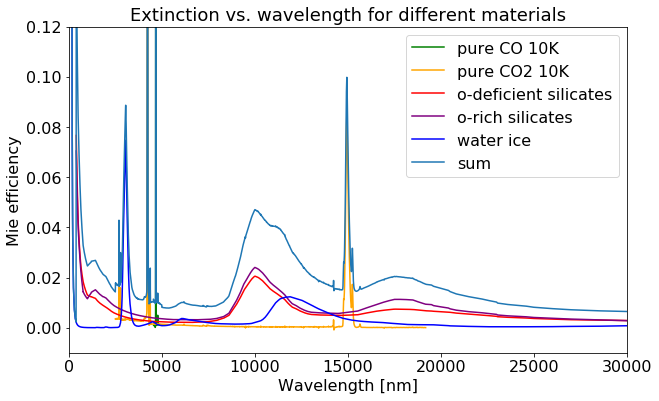

In [333]:
# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)

#wavelengths
ax1.plot(ws,qext_all["qext_co"],'green',label='pure CO 10K')
ax1.plot(ws,qext_all["qext_co2"],'orange',label='pure CO2 10K')
ax1.plot(ws,qext_all["qext_si1"],'r',label='o-deficient silicates')
ax1.plot(ws,qext_all["qext_si2"],'purple',label='o-rich silicates')
ax1.plot(ws,qext_all["qext_h2o"],'b',label='water ice')
ax1.plot(ws,qext_all["qext_sum"],label='sum')

ax1.set_xlim(0,30000)
#ax1.set_xlim(4500,4800)
ax1.set_ylim(-0.01,0.12)

ax1.set_xlabel("Wavelength [nm]",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength for different materials",fontsize=18)
ax1.legend(fontsize=16)

match Figure 1 in Boogert et al.

Text(0.5, 1.0, 'Extinction vs. wavelength')

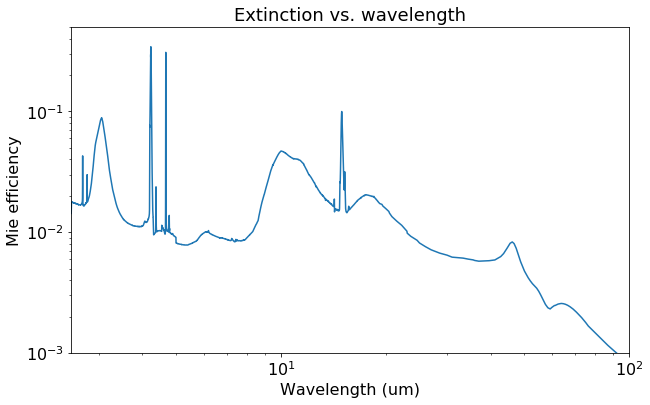

In [334]:
# wavelength in microns
wavelengths = ws/1000 #[um]

# plotted wavelength range: 0 to 100 um
# log scale both axes

# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(wavelengths,qext_all["qext_sum"])

ax1.set_xlim(2.5,100)
ax1.set_ylim(1e-3,0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Mie efficiency",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Extinction vs. wavelength",fontsize=18)


Calculate flux

\begin{equation}
F = F_o e^{-\tau} = F_o e^{-Q_{ext}\pi a^2 N}
\end{equation}

Start with column density $N \approx 10^{17} cm^{-2}$

Text(0.5, 1.0, 'Absorption Spectrum')

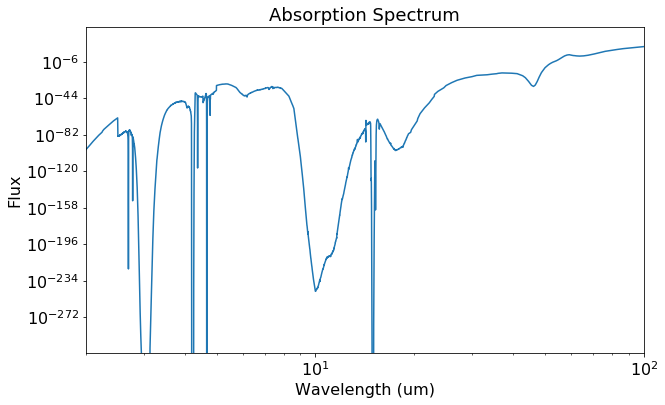

In [414]:
a = d/2 #[nm]
N = 7e14*(1e-7)**2 #[nm^-2]
Qext = qext_all["qext_sum"]

F_arr = (np.e**(-Qext*np.pi*a**2*N))*(1e7**2) #[W cm^-2]

# plot
fig=plt.figure(1,figsize=(10,6))
ax1=fig.add_subplot(111)
ax1.plot(wavelengths,F_arr)

ax1.set_xlim(2,100)
#ax1.set_ylim(1e-15,1e15)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax1.set_xlabel("Wavelength (um)",fontsize=16)
ax1.set_ylabel("Flux",fontsize=16)
for tick in ax1.xaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
for tick in ax1.yaxis.get_major_ticks():
    tick.label1.set_fontsize(16)
ax1.set_title("Absorption Spectrum",fontsize=18)